# SC1015 Group 7 Project 
## Problem definition: How can we predict a movie's rating solely based on its review?
Using sentiment analysis with a Multi-layer Perceptron Neural Network model from sklearn to analyse the language of a movie review to give an positive or negative rating.

## Part 1: Data Exploration

### Import essential libraries

In [ ]:
# Install dependencies
!pip install -r ./requirements.txt

In [1]:
# Some standard helper libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os

# Some machine learning libraries
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords') # to download nltk stopwords

### Reading the IMDb review CSV data
 #### <font color=#fc2d1e>IMPORTANT: During cleaning data process, please skip ahead and run IMDB_cleaned_data.csv located below after "Tokenisation of data to build a classification model" to avoid waiting an unnecessarily long time for the entire cleaning process to finish.</font>

In [2]:
# Read imdb review data into a dataframe
data = pd.read_csv('./datasets/imdb_master.csv', encoding="ISO-8859-1")
data.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


## Data visualisation to get an intuitive idea of what we are working with

#### Words in positive and negative reviews visualisation

In [4]:
# Some data visualisation of words in negative and positive reviews
negdatawords = data[data['label'] == 'neg']
posdatawords = data[data['label'] == 'pos']

In [ ]:
from wordcloud import WordCloud

# Visualising negative reviews words
cloud = WordCloud(width=800, height=600).generate(" ".join(negdatawords['review']))
plt.figure(figsize=(15, 10))
plt.title(label="Negative reviews words", fontsize=20, color="green")
plt.imshow(cloud)
plt.axis('off')

In [ ]:
# Visualising positive review words
cloud = WordCloud(width=800, height=600).generate(" ".join(posdatawords['review'])) # join function can help merge all words into one string. " " means space can be a sep between words.
plt.figure(figsize=(15, 10))
plt.title(label="Positive reviews words", fontsize=20, color="green")
plt.imshow(cloud)
plt.axis('off')

#### Distribution of positive, negative, and unlabelled data in the dataset

[Text(0, 0, 'neg'), Text(1, 0, 'pos'), Text(2, 0, 'unsup')]

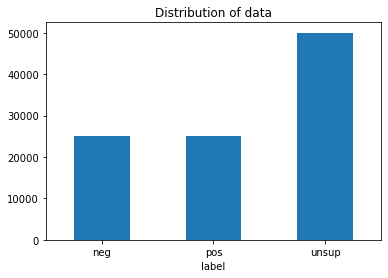

In [3]:
# Distribution of positive, negative and unlabelled data
maindata = data[['review','label']]
ax = maindata.groupby('label').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['neg','pos','unsup'], rotation=0)

Comment: \
Fairly equal distribution of data so far but still needs some cleanup. As seen above, the postive and negative datasets both have common words such as 'film' and 'movie' that would be redundant in analysing.

### Doing some initial data cleaning and preparation
1. Separated 'unsup' label from the rest
2. Removed train test label for random train and test
3. Remove punctuation marks, make all letters lowercase, etc.
4. **<font color=#fc2d1e>As there is a large amount of data (10000 entries), we will export the cleaned data as a CSV file and re-import it to save on the cleaning time. There is no actual need to run the subsequent codes anymore.</font>**


#### Removing useless columns

In [16]:
# Removed train test label, and the other labels
cleaned_data = data.drop(columns=['type', 'file', 'Unnamed: 0'])
print(cleaned_data.isnull().sum()) # just to check that there's no NA values

review    0
label     0
dtype: int64


#### Make the reviews lowercase and without punctuations

In [17]:
# Make letters lowercase and remove punctuations and putting them inside new dataset called 'review'
cleaned_data["cleaned_review"] = cleaned_data["review"].str.lower()
cleaned_data["cleaned_review"] = cleaned_data['cleaned_review'].str.replace('[^\w\s]', '')

<ipython-input-17-c4513ac3038c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_data["cleaned_review"] = cleaned_data['cleaned_review'].str.replace('[^\w\s]', '')


In [18]:
# Take a peek at the data
print(cleaned_data.describe())
print(f"\nDimensions: {cleaned_data.shape}\n")
print(cleaned_data.dtypes)

                                                   review   label  \
count                                              100000  100000   
unique                                              98469       3   
top     Am not from America, I usually watch this show...   unsup   
freq                                                    6   50000   

                                           cleaned_review  
count                                              100000  
unique                                              98467  
top     am not from america i usually watch this show ...  
freq                                                    6  

Dimensions: (100000, 3)

review            object
label             object
cleaned_review    object
dtype: object


### Tokenisation of data in order to build a classification model
#### It means that we are going to make each word into a token to feed into the ML model, instead of feeding the model a string.
Process includes:

1. Made words into stem form
2. Removed stop words (frequently used English words)
3. Tokenised sentences into arrays of words

In [1]:
# Tokenise the sentence into list of words (removed stopwords)
# Don't run this I made a cleaned csv file, unless you are very free, or want to take a break for ~10 minutes
"""
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer as PS

ps = PS()

stop_words = set(stopwords.words('english'))

# Stemming words and removing stop words
cleaned_data['tokenised_review'] = [' '.join([ps.stem(y) for y in x.split() if y not in stop_words]) for x in cleaned_data['cleaned_review']]

# Tokenising sentences into array of words
# This step is not really that necessary since we are going to vectorise
# this using a function from sklearn in the next part
cleaned_data['tokenised_review'] = cleaned_data['tokenised_review'].apply(lambda x: x[:].split(' '))

"""

"\nfrom nltk.corpus import stopwords\nfrom nltk.stem import PorterStemmer as PS\n\nps = PS()\n\nstop_words = set(stopwords.words('english'))\n\n# Stemming words and removing stop words\ncleaned_data['tokenised_review'] = [' '.join([ps.stem(y) for y in x.split() if y not in stop_words]) for x in cleaned_data['cleaned_review']]\n\n# Tokenising sentences into array of words\n# This step is not really that necessary since we are going to vectorise\n# this using a function from sklearn in the next part\ncleaned_data['tokenised_review'] = cleaned_data['tokenised_review'].apply(lambda x: x[:].split(' '))\n\n"

#### The cleaned data csv could be found here

In [20]:
# Unzip the csv file if not unzipped already, uncomment line below
# !unzip imdb_master_cleaned.zip 
cleaned_data = pd.read_csv("./datasets/imdb_master_cleaned.csv")
cleaned_data.head()

,review,label,cleaned_review,tokenised_review
0,Once again Mr. Costner has dragged out a movie...,neg,once again mr costner has dragged out a movie ...,"['mr', 'costner', 'drag', 'movi', 'far', 'long..."
1,This is an example of why the majority of acti...,neg,this is an example of why the majority of acti...,"['exampl', 'major', 'action', 'film', 'gener',..."
2,"First of all I hate those moronic rappers, who...",neg,first of all i hate those moronic rappers who ...,"['first', 'hate', 'moron', 'rapper', 'couldnt'..."
3,Not even the Beatles could write songs everyon...,neg,not even the beatles could write songs everyon...,"['even', 'beatl', 'could', 'write', 'song', 'e..."
4,Brass pictures (movies is not a fitting word f...,neg,brass pictures movies is not a fitting word fo...,"['brass', 'pictur', 'movi', 'fit', 'word', 're..."
